In [4]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("./movies_metadata.csv")
print(df.head())

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497         

In [7]:
df.drop(df.index[19730], inplace=True)
df.drop(df.index[29502], inplace=True)
df.drop(df.index[35585], inplace=True)

In [11]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
df_numeric = df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'title']]

In [10]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II


In [12]:
df_numeric.isnull().sum()

budget            0
popularity        3
revenue           3
runtime         260
vote_average      3
vote_count        3
title             3
dtype: int64

In [13]:
df_numeric.dropna(inplace=True)

<ipython-input-13-6b0fc49f877c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)


In [14]:
df_numeric['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [15]:
df_numeric['vote_count'].quantile(np.arange(.74, 1, 0.01))

0.74      32.00
0.75      34.00
0.76      37.00
0.77      40.00
0.78      43.00
0.79      46.00
0.80      51.00
0.81      55.00
0.82      61.00
0.83      67.00
0.84      74.00
0.85      83.00
0.86      92.00
0.87     104.74
0.88     119.00
0.89     139.00
0.90     161.00
0.91     193.00
0.92     230.00
0.93     283.00
0.94     349.00
0.95     435.90
0.96     581.00
0.97     827.94
0.98    1243.88
0.99    2196.84
Name: vote_count, dtype: float64

In [16]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [17]:
df_numeric.shape

(12178, 7)

In [18]:
from sklearn import preprocessing

In [20]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title', axis=1))

In [21]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

In [22]:
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111


In [23]:
kmeans = KMeans(n_clusters=5)

In [24]:
kmeans.fit(df_numeric_scaled)

KMeans(n_clusters=5)

In [25]:
len(kmeans.labels_)

12178

In [26]:
df_numeric['cluster'] = kmeans.labels_

In [28]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,3
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,1
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0


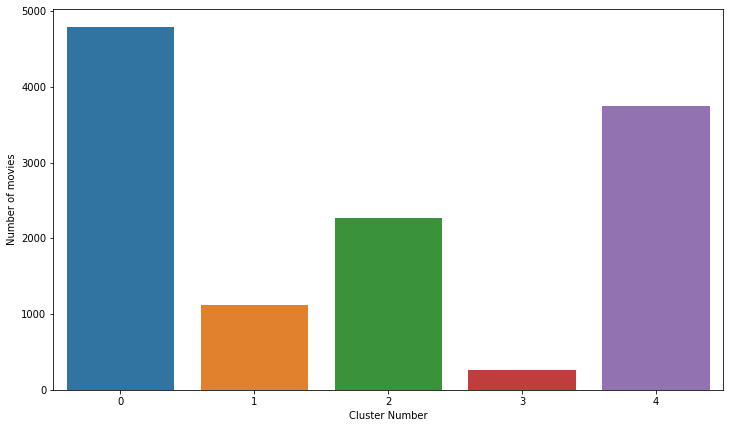

In [29]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [30]:
df_numeric.groupby(['cluster']).mean()

,revenue,runtime,vote_average,vote_count
cluster,,,,
0,1.443148e+07,100.397492,6.189028,169.585371
1,1.615473e+08,114.276046,6.210240,1129.120214
2,1.028055e+07,93.718130,4.940979,122.632554
3,6.288649e+08,126.146154,6.903846,4738.096154
4,1.687969e+07,109.901950,7.278520,304.510286


In [31]:
size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)

In [32]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
4756,115000000,26.42,562816256.0,92.0,7.5,6150.0,"Monsters, Inc.",3
23692,170000000,75.3852,710644566.0,130.0,7.3,4511.0,Dawn of the Planet of the Apes,3
23675,61000000,154.801,369330363.0,145.0,7.9,6023.0,Gone Girl,3
26560,230000000,133.828,794191988.0,129.0,6.6,2814.0,Pirates of the Caribbean: Dead Men Tell No Tales,3
1225,19000000,25.7785,381109762.0,116.0,8.0,6239.0,Back to the Future,3


In [33]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
13952,38000000,8.4508,205298907.0,96.0,6.4,1005.0,The Ugly Truth,1
15151,45000000,9.66754,7810000.0,104.0,5.6,399.0,Solomon Kane,1
39334,105000000,20.151037,408579038.0,100.0,5.6,1170.0,Ice Age: Collision Course,1
21337,61000000,13.3365,131940411.0,109.0,6.6,1611.0,2 Guns,1
23561,18000000,18.1933,103215094.0,119.0,7.4,4657.0,Birdman,1


In [34]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[2])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
29180,0,3.25302,0.0,139.0,5.3,79.0,Kiss Me Again,2
14501,12000000,3.58088,4884663.0,100.0,5.5,59.0,Invaders from Mars,2
4819,0,3.84685,0.0,107.0,5.3,51.0,Invasion U.S.A.,2
39554,0,6.729595,0.0,121.0,2.8,97.0,Back in the Day,2
43520,0,2.62384,0.0,100.0,5.5,56.0,Le Jaguar,2


In [35]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[3])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
32732,0,10.5912,0.0,95.0,7.1,141.0,The Outcasts,4
2832,2000000,12.5367,78898765.0,115.0,6.9,773.0,From Russia with Love,4
12963,0,2.35707,0.0,112.0,7.9,40.0,An Autumn Afternoon,4
39788,9000000,8.475983,4600000.0,120.0,6.9,251.0,Anthropoid,4
8338,0,4.32077,0.0,73.0,7.2,96.0,Vampyr,4


In [36]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[4])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
5439,21000000,13.2174,43928932.0,92.0,6.6,1724.0,The Transporter,0
40463,0,5.248189,0.0,102.0,6.4,93.0,"Kiki, Love to Love",0
10066,0,7.81081,0.0,74.0,6.7,201.0,DuckTales: The Movie - Treasure of the Lost Lamp,0
26114,0,7.18543,0.0,91.0,5.6,55.0,Lizzie Borden Took An Ax,0
23011,0,2.99411,0.0,0.0,6.5,69.0,Meu Passado me Condena,0


In [37]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,3
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,1
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0


In [46]:
df_numeric['movieId'] = range(1, len(df_numeric)+1)

In [47]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster,movieId
0,30000000,21.9469,373554033.0,81.0,7.7,5415.0,Toy Story,3,1
1,65000000,17.0155,262797249.0,104.0,6.9,2413.0,Jumanji,1,2
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0,3
3,16000000,3.85949,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0,4
4,0,8.38752,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0,5


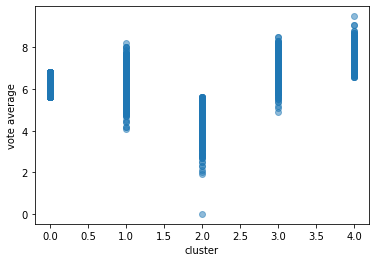

In [62]:
plt.scatter(df_numeric['cluster'], df_numeric['vote_average'], alpha=0.5)
plt.xlabel('cluster')
plt.ylabel('vote average')
plt.show()

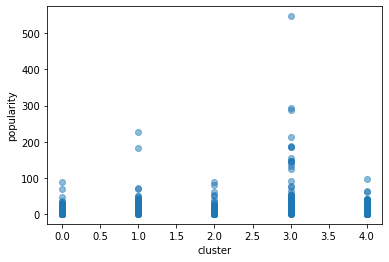

In [61]:
plt.scatter(df_numeric['cluster'], df_numeric['popularity'], alpha=0.5)
plt.xlabel('cluster')
plt.ylabel('popularity')
plt.show()

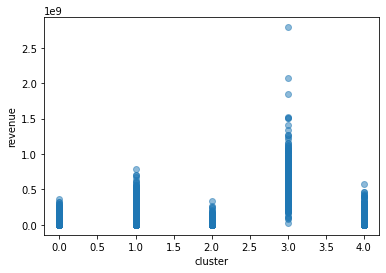

In [60]:
plt.scatter(df_numeric['cluster'], df_numeric['revenue'], alpha=0.5)
plt.xlabel('cluster')
plt.ylabel('revenue')
plt.show()

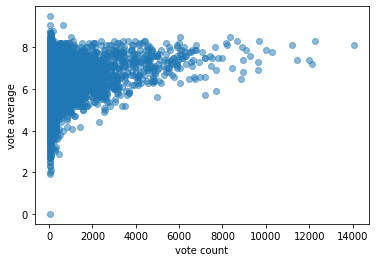

In [59]:
plt.scatter(df_numeric['vote_count'], df_numeric['vote_average'], alpha=0.5)
plt.xlabel('vote count')
plt.ylabel('vote average')
plt.show()

In [65]:
df_numeric.to_csv(r'./cleaned_movies.csv', index=False)